In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# image path
img_path = 'lena.png'

# read the image in full color
img_BGR = cv2.imread(img_path, cv2.IMREAD_COLOR)

# show the image in RGB form:
def show_image_RGB(img_BGR):
    plt.imshow(cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB))
    plt.show()

# Change the s channel in HSV

Original image:


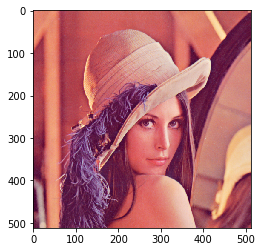

Decrease the saturation by 0.2:


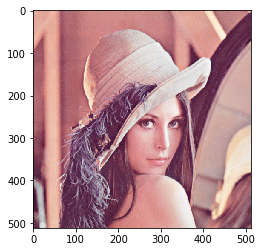

Increase the saturation by 0.2:


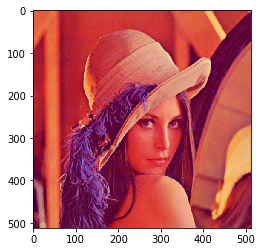

In [11]:
# change the s channel in HSV
def change_HSV_saturation(img_BGR, change_percentage):
    img_HSV = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV)
    img_HSV_new = img_HSV.astype('float32')
    img_HSV_new[:,:,1] = img_HSV_new[:,:,1]/255 + change_percentage
    img_HSV_new[:,:,1] = np.clip(img_HSV_new[:,:,1], 0, 1)
    img_HSV_new[:,:,1] = img_HSV_new[:,:,1]*255
    img_HSV_new = img_HSV_new.astype('uint8')
    img_BGR_new = cv2.cvtColor(img_HSV_new, cv2.COLOR_HSV2BGR)
    return img_BGR_new

# original 
print('Original image:')
show_image_RGB(img_BGR)

# decrease the saturation by 0.2
print('Decrease the saturation by 0.2:')
show_image_RGB(change_HSV_saturation(img_BGR, change_percentage = -0.2))


# increase the saturation by 0.2
print('Increase the saturation by 0.2:')
show_image_RGB(change_HSV_saturation(img_BGR, change_percentage = 0.2))

# Histogram Equalization

Case 1:


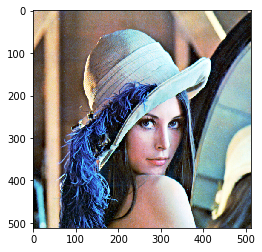

Case 2:


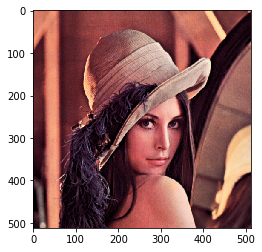

In [18]:
# case 1 : For each channel
img_BGR_new = img_BGR.copy()

for i in range(3):
    # Change the channel in equalizeHist method
    img_BGR_new[:,:,i] = cv2.equalizeHist(img_BGR_new[:,:,i])
    
# New image    
print('Case 1:')
show_image_RGB(img_BGR_new)    

# case 2 : For V channel in HSV 
img_BGR_new = img_BGR.copy()
img_HSV_new = cv2.cvtColor(img_BGR_new, cv2.COLOR_BGR2HSV)
img_HSV_new[:,:,2] = cv2.equalizeHist(img_HSV_new[:,:,2])
img_BGR_new = cv2.cvtColor(img_HSV_new, cv2.COLOR_HSV2BGR)
    
# New image    
print('Case 2:')
show_image_RGB(img_BGR_new) 

# Adjust the contrast and lightness

Original image:


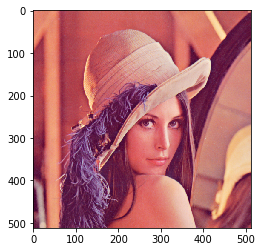

Add the contrast:


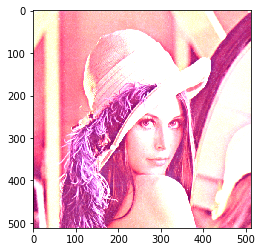

Add the lightness:


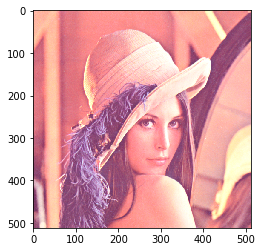

In [23]:
add_contrast = cv2.convertScaleAbs(img_BGR, alpha = 2.0, beta = 0)
add_lightness = cv2.convertScaleAbs(img_BGR, alpha = 1.0, beta = 50)

print('Original image:')
show_image_RGB(img_BGR)

print('Add the contrast:')
show_image_RGB(add_contrast)  

print('Add the lightness:')
show_image_RGB(add_lightness) 